In [1]:
#Tratamiento de filesystem
#import os
#import sys
#sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__)))
##%load_ext autoreload
#%autoreload 2

import Recursos
#Tratamientos de datos
import numpy as np
#Gráficos
import matplotlib.pyplot as plt
import scipy.stats as stats
#Modelos
from sklearn.mixture import GaussianMixture
import seaborn as sns
import pandas as pd

In [2]:
#imagen caso ideal 
NOMBRE_IMG1 = 'A4762-HD166734.fits' 
#posee un espectro celeste
datos, clusters = Recursos.getInfo(NOMBRE_IMG1)
#x = np.arange(Y.size)
Y = np.sum(Recursos.normalize(datos), axis=0) 
#se crea para cada caso su nuevo dataset
Y_nuevo = (Recursos.generar_nuevos_datos(Y))
Y_copia = Y_nuevo.copy().reshape(-1,1)

Dimension de los nuevos datos: (175675,)


In [117]:
CANT_IMG = 20

Siendo un modelo probabilístico se pueden aplicar métricas como el Akaike information criterion (AIC) o Bayesian information criterion (BIC) para identificar cómo se van ajustando los datos observados al modelo. Cabe aclarar que en ambas métricas, cuanto más bajo sea el valor es mejor. Por lo que se prueba para revisar el modelo con un rango de 1 a x como valores del nro de componentes.
Entonces se plantea calcular los valores AIC y BIC para poder seleccionar la distribución con mejor ajuste.

In [27]:
"""se entrena modelos con 1- cant_comp componentes"""
def calcular_metricas(cant_comp):
    N = np.arange(1, cant_comp+1)
    modelos = [None for i in range(len(N))]
    for i in range(len(N)):
        modelos[i] = GaussianMixture(N[i]).fit(Y_copia)
    #se calcula AIC y BIC
    AIC = [m.aic(Y_copia) for m in modelos]
    BIC = [m.bic(Y_copia) for m in modelos]
    
    #grafico 
    plt.plot(N, AIC, '-k', label='AIC')
    plt.plot(N, BIC, '--k', label='BIC')
    #plt.setxlabel('nro componentes')
    #plt.set_ylabel('informacion')
    plt.legend(loc=2)
    plt.show()
    
    #print('Valor metadata: ',str(clusters),', nuevo valor: ',str(clusters*3))
    print('Valor minimo (AIC): ', str(np.argmin(AIC)))
    print('Valor minimo (BIC): ', str(np.argmin(BIC)))
    return modelos[np.argmin(AIC)], modelos[np.argmin(BIC)]


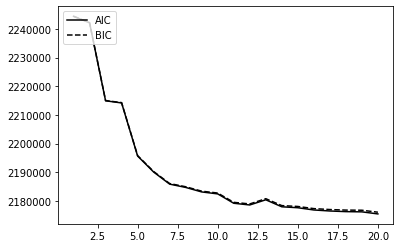

Valor metadata:  1 , nuevo valor:  3
Valor minimo (AIC):  19
Valor minimo (BIC):  19


In [23]:
AIC, BIC = calcular_metricas(20)

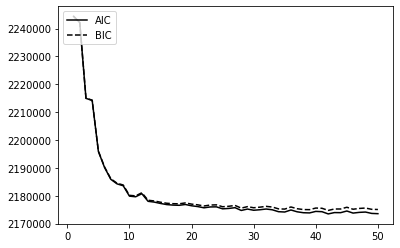

Valor metadata:  1 , nuevo valor:  3
Valor minimo (AIC):  41
Valor minimo (BIC):  41


In [25]:
AIC, BIC = calcular_metricas(50)

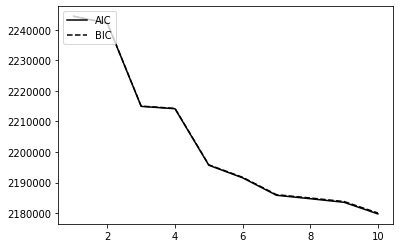

Valor minimo (AIC):  9
Valor minimo (BIC):  9


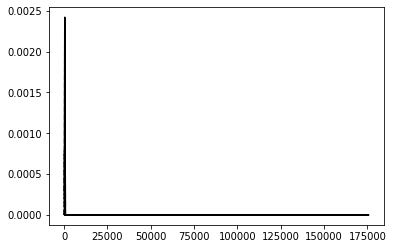

In [30]:
aic, bic = calcular_metricas(10)

In [39]:
def graficar_modelo_metrica(M_best):    
    #x_best = np.linspace(0,Y_nuevo.size, 1000) 
    ax = sns.kdeplot(Y_nuevo, shade=False, color='crimson')
    ax2.plot(Y, color="blue",ls='--')

    x_best = np.arange(Y.size)
    logprob = M_best.score_samples(x_best.reshape(-1, 1))
    responsibilities = M_best.predict_proba(x_best.reshape(-1, 1)) #revisar
#verificar si aplicar pdf para graficar ya que se tiene que mostrar
#sombreado vs el modelo clusters*3 sombreado tambien
    pdf = np.exp(logprob)
    #pdf_individual = responsibilities * pdf[:, np.newaxis]
    plt.plot(x_best, pdf, '--',color='red')
    #plt.plot(x_best, pdf_individual, '--k')
    plt.show()

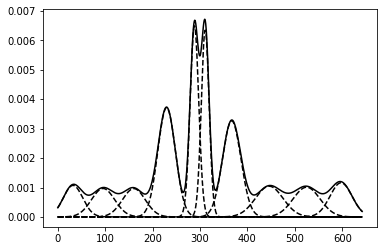

In [36]:
graficar_modelo_metrica(aic)

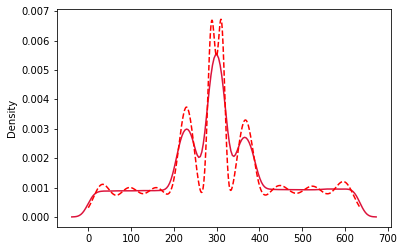

In [40]:
graficar_modelo_metrica(aic)

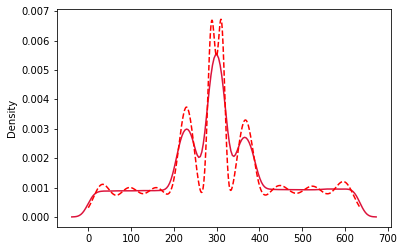

In [41]:
graficar_modelo_metrica(bic)

In [ ]:
#plot 1 
#121: imagen sombreada con model gmm
#122: modelo

#221: imagen sombreada con model gmm (min BIC)
#222: modelo (min BIC)

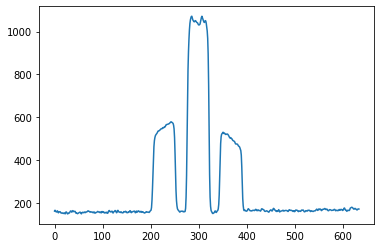

In [42]:
plt.plot(Y)

TypeError: object of type 'AxesSubplot' has no len()

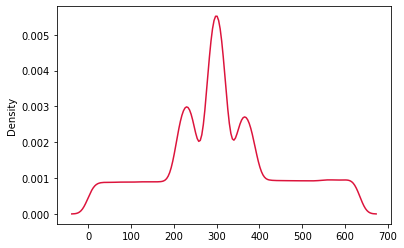

In [50]:

y = sns.kdeplot(Y_nuevo, shade=False, color='crimson')# np.array(Y.copy()) #distribucion datos
x = np.arange(len(y))

f = np.poly1d(np.polyfit(x, y, 100))

x_new = np.linspace(x[0], x[-1], 100)
y_new = f(x_new)

plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()

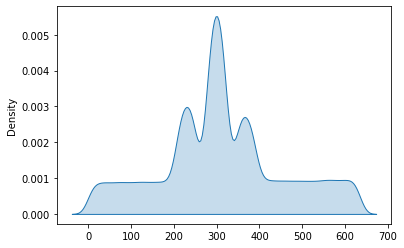

In [52]:
sns.kdeplot(
    data=Y_nuevo, 
    fill=True, thresh=0, levels=100, cmap="mako",
)

In [77]:
print(Y[:3])
print(Y_nuevo.shape)

[161.92306425 165.48256037 162.41543842]
(175675,)


In [76]:
#print('Dimension de los nuevos datos: '+str(nuevo_dataset.shape))
#se crean los nuevos datos
media = np.mean(Y)
print('prom: ',media)
nuevo_dataset = []   #nueva funcion
for i in range(Y.size):
    #Y[i] es un valor decimal entonces se aplica int
    #se genera tantos datos como diga Y[i]  con el valor i
    if(Y[i] > media):
        nuevos = np.ones( int(Y[i])) *i   
        nuevo_dataset = np.append(nuevo_dataset, nuevos)
    
#se muestra la nueva dimension de los datos generados
print('Dimension de los nuevos datos: '+str(nuevo_dataset.shape))

prom:  277.1648985872848
Dimension de los nuevos datos: (96108,)


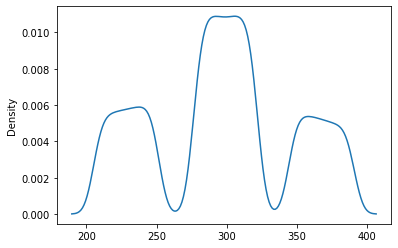

In [78]:
sns.kdeplot(nuevo_dataset)
#ax.plot(datos, np.full_like(datos, -0.01), '|k', markeredgewidth=1)


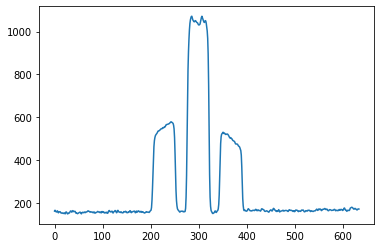

In [79]:
plt.plot(Y)

In [ ]:
Y_copia = nuevo_dataset.copy().reshape(-1,1)


In [81]:
def calcular_metricas2(cant_comp, Y):
    """se entrena modelos con 1- cant_comp componentes"""
    N = np.arange(1, cant_comp+1)
    modelos = [None for i in range(len(N))]
    for i in range(len(N)):
        modelos[i] = GaussianMixture(N[i]).fit(Y)
    #se calcula AIC y BIC
    AIC = [m.aic(Y) for m in modelos]
    BIC = [m.bic(Y) for m in modelos]
    
    #grafico 
    plt.plot(N, AIC, '-k', label='AIC')
    plt.plot(N, BIC, '--k', label='BIC')
    #plt.setxlabel('nro componentes')
    #plt.set_ylabel('informacion')
    plt.legend(loc=2)
    plt.show()
    
    #print('Valor metadata: ',str(clusters),', nuevo valor: ',str(clusters*3))
    print('Valor minimo (AIC): ', str(np.argmin(AIC)))
    print('Valor minimo (BIC): ', str(np.argmin(BIC)))
    #return modelos[np.argmin(AIC)], modelos[np.argmin(BIC)]


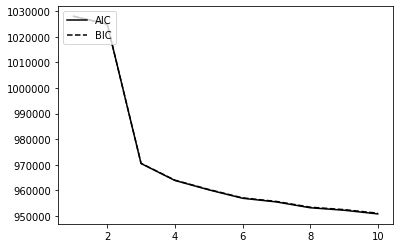

Valor minimo (AIC):  9
Valor minimo (BIC):  9


In [83]:
calcular_metricas2(10, Y_copia)

In [91]:
Y_nuevo = (Recursos.generar_nuevos_datos(Y))
Y_copia = Y_nuevo.copy().reshape(-1,1)

Dimension de los nuevos datos: (100745,)


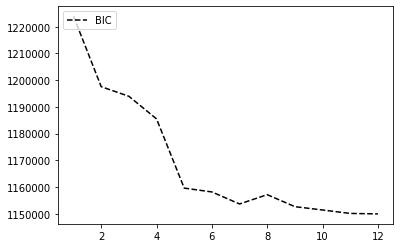

In [92]:
N = np.arange(1, 13) 
modelos = [None for i in range(len(N))]
for i in range(len(N)):
    modelos[i] = GaussianMixture(N[i]).fit(Y_copia)
#se calcula AIC y BIC
#AIC = [m.aic(Y) for m in modelos]
BIC = [m.bic(Y_copia) for m in modelos]

#grafico 
#plt.plot(N, AIC, '-k', label='AIC')
plt.plot(N, BIC, '--k', label='BIC')
#plt.setxlabel('nro componentes')
#plt.set_ylabel('informacion')
plt.legend(loc=2)
plt.show()

#print('Valor metadata: ',str(clusters),', nuevo valor: ',str(clusters*3))
#print('Valor minimo (AIC): ', str(np.argmin(AIC)))
#print('Valor minimo (BIC): ', str(np.argmin(BIC)))

In [101]:
clusters_bic = np.argmin(BIC)
modelo_bic = modelos[clusters_bic-1]
modelo = modelos[clusters*3-1]

In [135]:
sns.set_palette("pastel")


In [141]:
def graficar_regiones(modelo, clusters, Y_nuevo):
    mu = np.abs(modelo.means_.flatten())
    std = np.sqrt(np.abs(modelo.covariances_.flatten()))
    ax = sns.kdeplot(Y_nuevo, shade=False, label='dist. kde', color= '#0B132B')
    kdeline = ax.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    
    #fig,ax1 = plt.subplots()
    for i in range(clusters):
        y_values = stats.norm(mu[i], std[i])
        x0 = mu[i]-std[i]
        x1 = mu[i]+std[i]
        
        ax.set_ylabel("Densidad de nuevos datos")
        #ax.set_title('Media & desvío estándar del modelo vs distr. KDE')
        #ax.legend()
        ax.vlines(mu[i], 0, np.interp(mu[i], xs, ys), color='white', ls=':')
        ax.fill_between(xs, 0, ys, alpha=0.2)
        ax.fill_between(xs, 0, ys, where=(x0 <= xs) & (xs <= x1), interpolate=True, facecolor='red', alpha=0.2)
    
    #se grafica con otro eje y para la funcion reducida de los datos 
    ax2=ax.twinx()
    ax2.plot(Y, color="blue",ls='-')
    ax2.set_ylabel("Y(valores de los datos)",color="blue",fontsize=14)
    #plt.legend(['KDE','Función de los datos'])
    plt.show()
    

IndexError: list index out of range

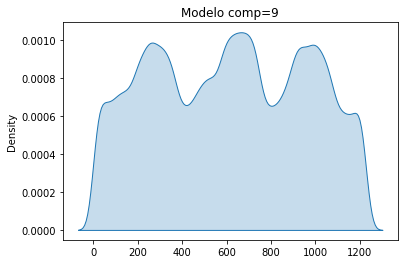

In [129]:
plt.title(label='Modelo comp='+str(clusters*3))
graficar_regiones(modelo, clusters*3)
plt.title(label='Modelo comp_bic='+str(clusters_bic))
graficar_regiones(modelo_bic, clusters_bic)

In [124]:
planilla = pd.read_csv('documents/planilla_imagenes_2.csv',  sep=';')
df = pd.DataFrame(planilla.values, columns = list(planilla))
#se obtiene la lista de imagenes disponibles - conjunto de 72
listaNombres = []
for tupla in df.itertuples():
    nombreImg = Recursos.obtenerNombre(tupla.PLATE_N, tupla.OBJECT)
    listaNombres.append(nombreImg)

Dimension de los nuevos datos: (696971,)


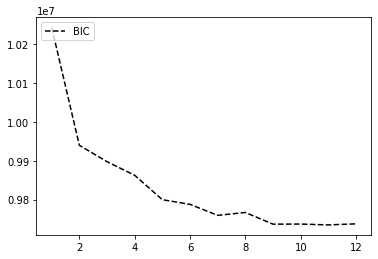

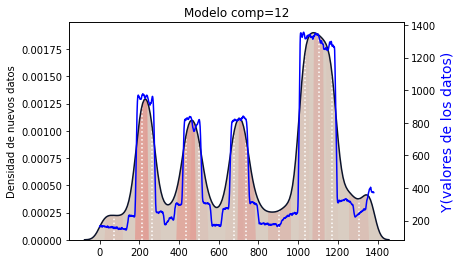

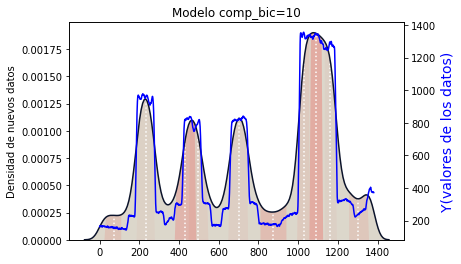

Dimension de los nuevos datos: (697477,)


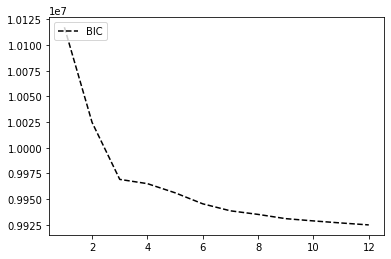

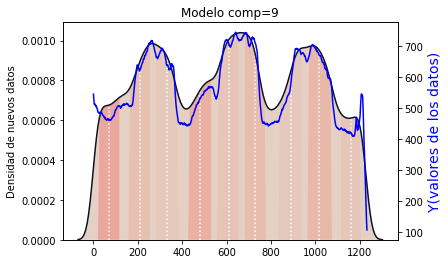

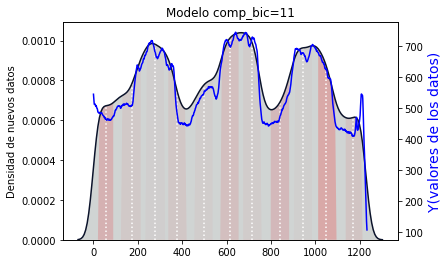

Dimension de los nuevos datos: (732548,)


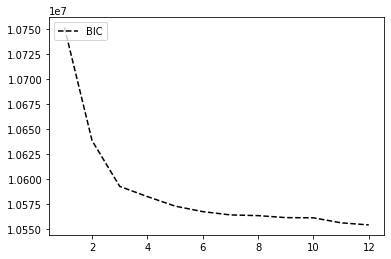

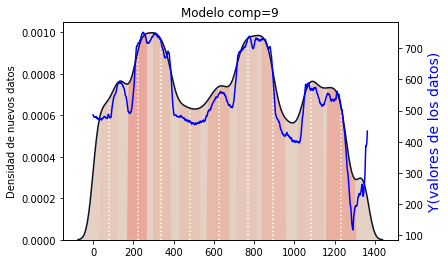

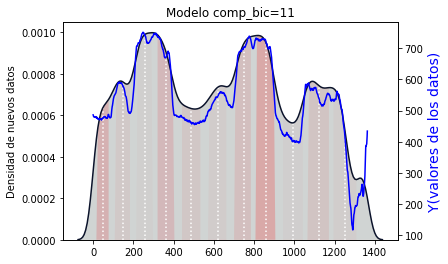

Dimension de los nuevos datos: (246157,)


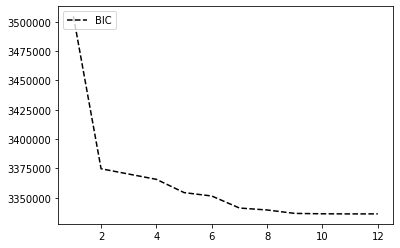

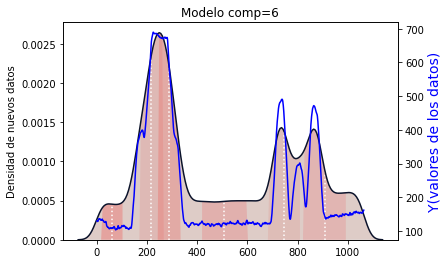

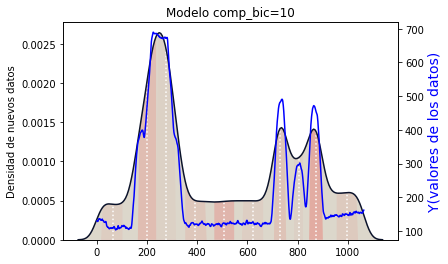

Dimension de los nuevos datos: (660652,)


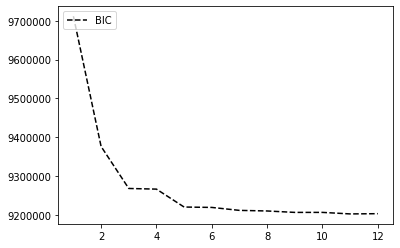

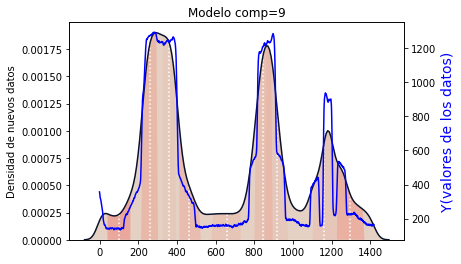

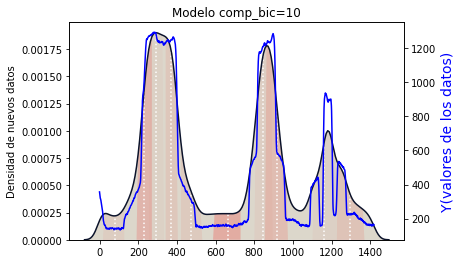

Dimension de los nuevos datos: (124714,)


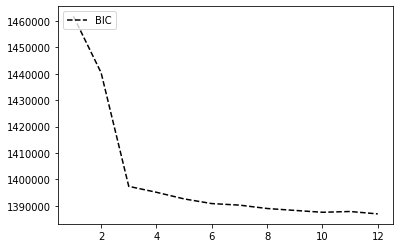

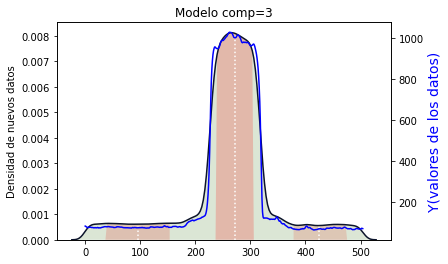

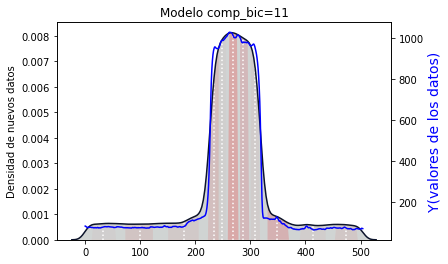

Dimension de los nuevos datos: (439707,)


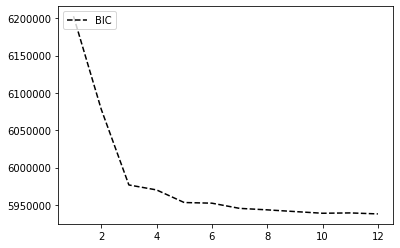

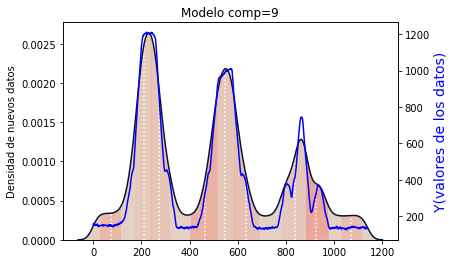

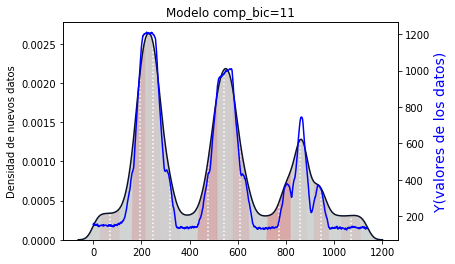

Dimension de los nuevos datos: (463335,)


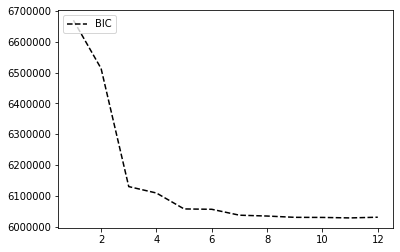

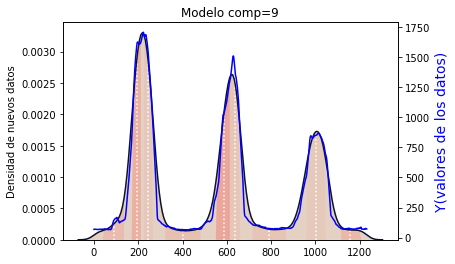

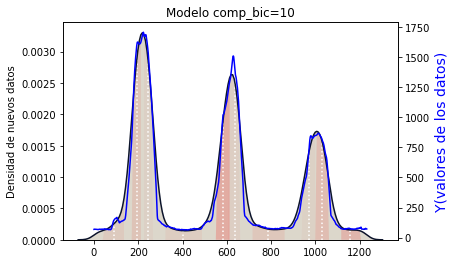

Dimension de los nuevos datos: (142865,)


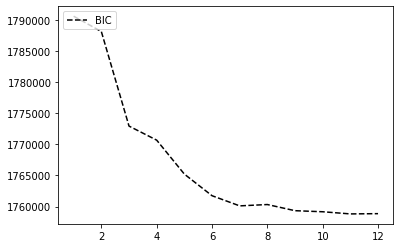

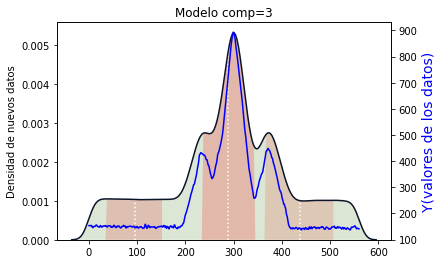

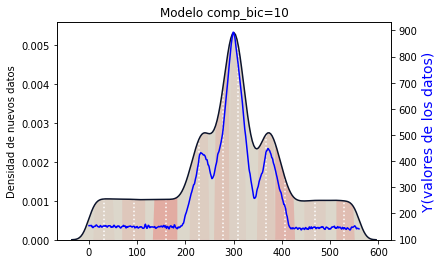

Dimension de los nuevos datos: (402359,)


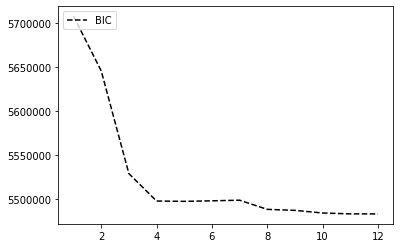

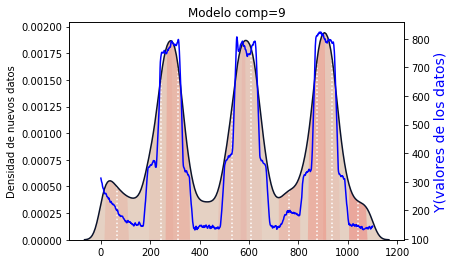

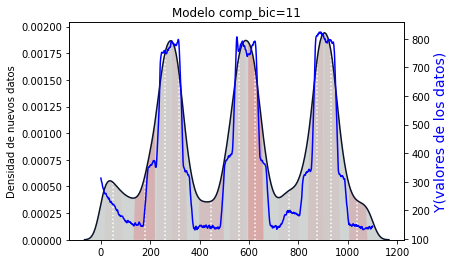

Dimension de los nuevos datos: (340438,)


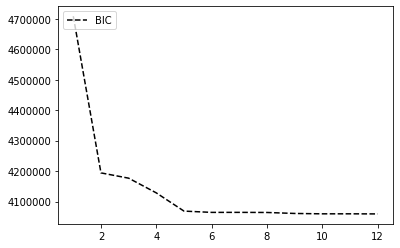

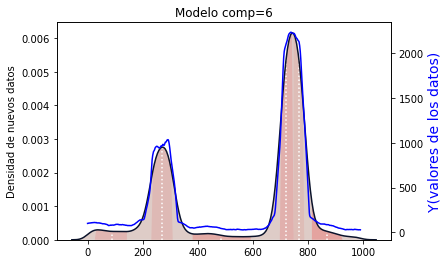

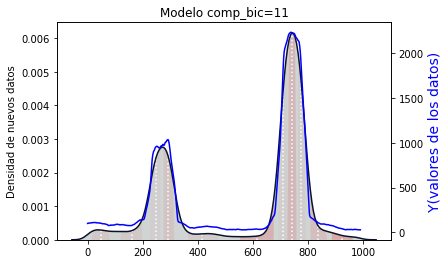

Dimension de los nuevos datos: (175675,)


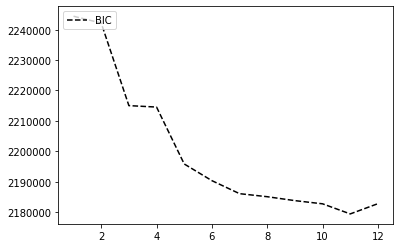

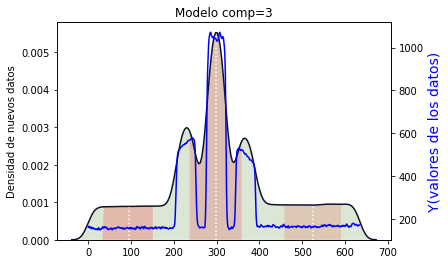

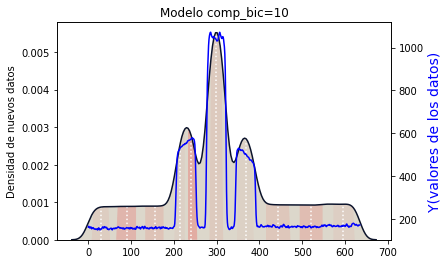

Dimension de los nuevos datos: (170248,)


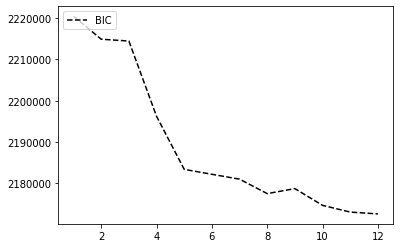

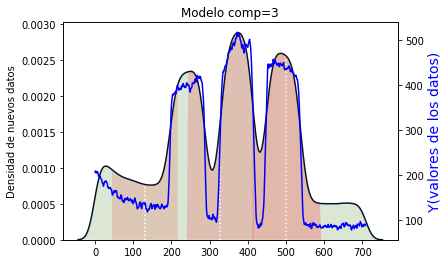

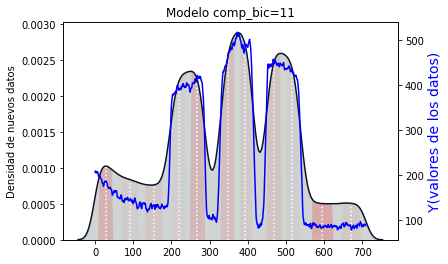

Dimension de los nuevos datos: (244191,)


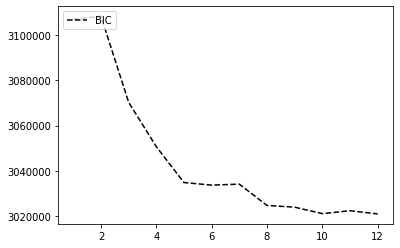

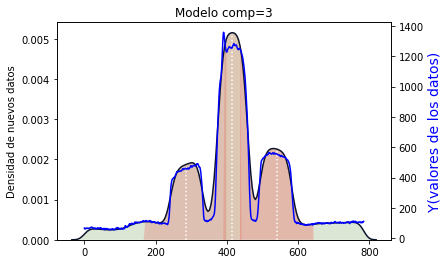

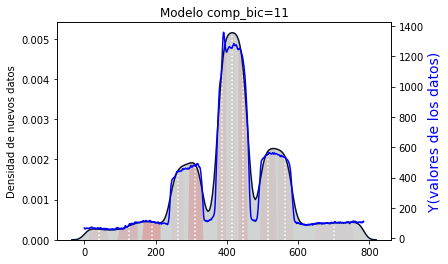

Dimension de los nuevos datos: (299752,)


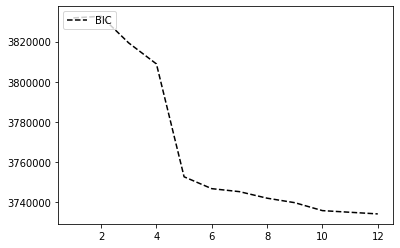

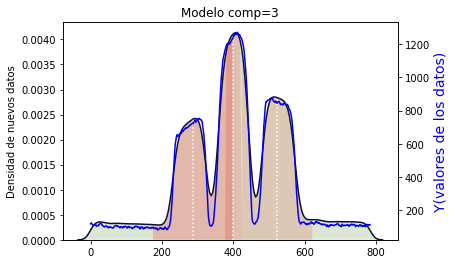

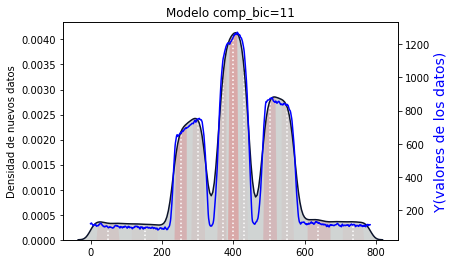

Dimension de los nuevos datos: (384595,)


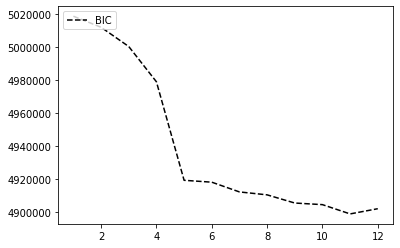

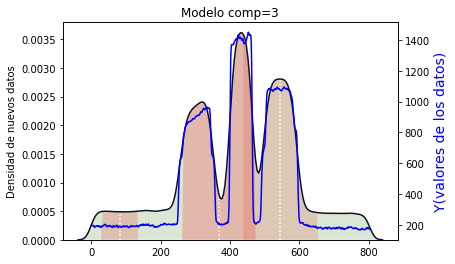

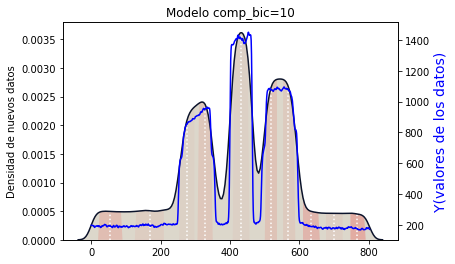

Dimension de los nuevos datos: (986420,)


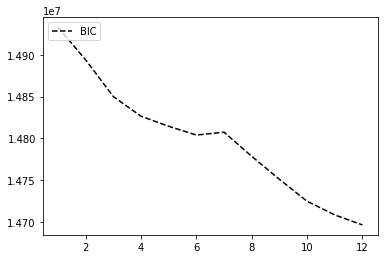

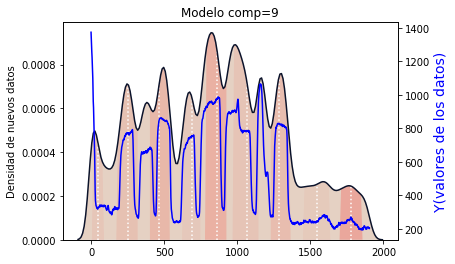

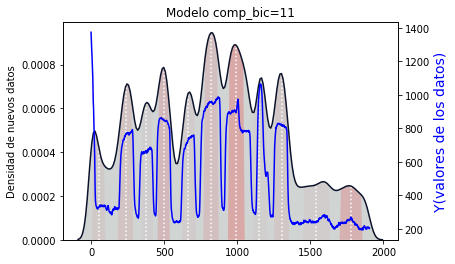

Dimension de los nuevos datos: (773441,)


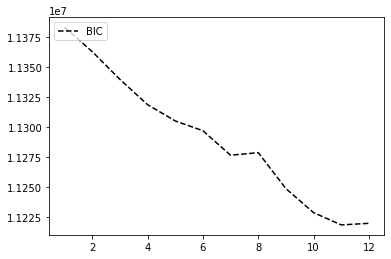

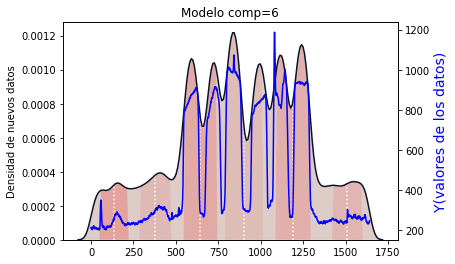

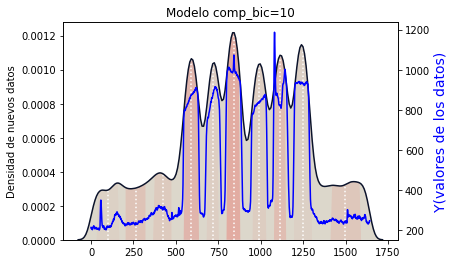

Dimension de los nuevos datos: (387755,)


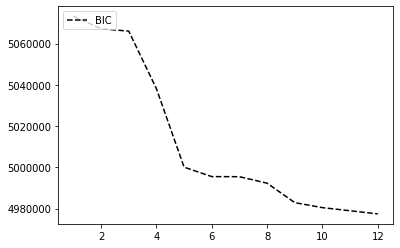

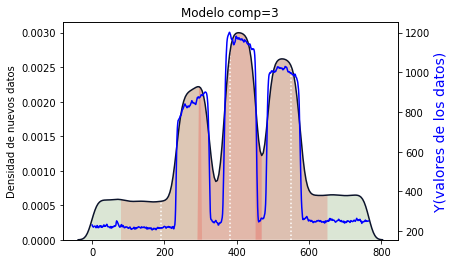

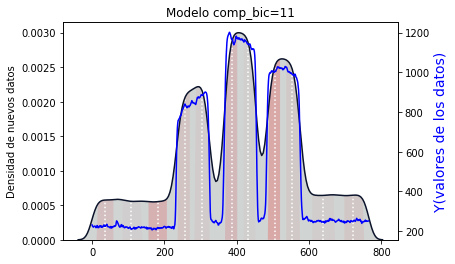

Dimension de los nuevos datos: (236247,)


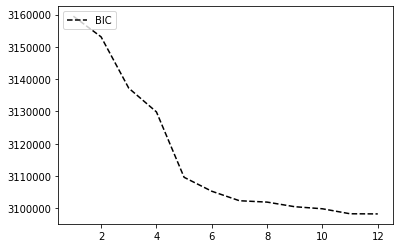

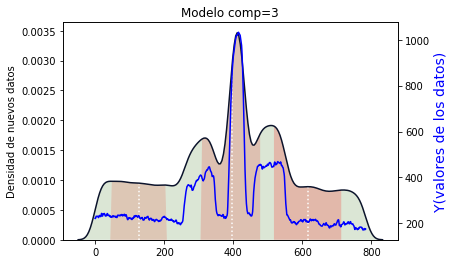

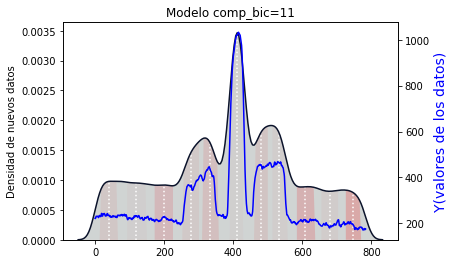

In [142]:
for nombreImg in listaNombres[:CANT_IMG]:
    #se obtiene informacion de la img
    datos, clusters = Recursos.getInfo(nombreImg)
    Y = np.sum(Recursos.normalize(datos), axis=0) 
    #se crea para cada caso su nuevo dataset
    #Y_nuevo = (Recursos.generar_nuevos_datos(Y)).reshape(-1,1)
    Y_nuevo = (Recursos.generar_nuevos_datos(Y))
    Y_copia = Y_nuevo.copy().reshape(-1,1)
    
    modelos = [None for i in range(len(N))]
    for i in range(len(N)):
        modelos[i] = GaussianMixture(N[i]).fit(Y_copia)
    BIC = [m.bic(Y_copia) for m in modelos]
    #grafico 
    plt.plot(N, BIC, '--k', label='BIC')
    plt.legend(loc=2)
    plt.show()
    
    clusters_bic = np.argmin(BIC)
    modelo_bic = modelos[clusters_bic-1]
    modelo = modelos[clusters*3-1]
    
    #se grafica resultados del modelo vs kde 
    #fig = plt.figure(nombreImg, figsize=(10,5))
    #fig.subplots_adjust(hspace=0.5, wspace=0.5)
    
    plt.title(label='Modelo comp='+str(clusters*3))
    graficar_regiones(modelo, clusters*3, Y_nuevo)
    plt.title(label='Modelo comp_bic='+str(clusters_bic))
    graficar_regiones(modelo_bic, clusters_bic, Y_nuevo)
    #fig.tight_layout() 
    #fig.suptitle(nombreImg, fontsize=12)
    plt.show()
    


In [145]:
lista_tabla = []
for nombreImg in listaNombres:
    #se obtiene informacion de la img
    datos, clusters = Recursos.getInfo(nombreImg)
    Y = np.sum(Recursos.normalize(datos), axis=0) 
    #se crea para cada caso su nuevo dataset
    #Y_nuevo = (Recursos.generar_nuevos_datos(Y)).reshape(-1,1)
    Y_nuevo = (Recursos.generar_nuevos_datos(Y))
    Y_copia = Y_nuevo.copy().reshape(-1,1)
    
    modelos = [None for i in range(len(N))]
    for i in range(len(N)):
        modelos[i] = GaussianMixture(N[i]).fit(Y_copia)
    BIC = [m.bic(Y_copia) for m in modelos]
    comps = [nombreImg,clusters, clusters*3,np.argmin(BIC)]
    lista_tabla.append(comps)

Dimension de los nuevos datos: (696971,)
Dimension de los nuevos datos: (697477,)


Dimension de los nuevos datos: (732548,)
Dimension de los nuevos datos: (246157,)


Dimension de los nuevos datos: (660652,)
Dimension de los nuevos datos: (124714,)


Dimension de los nuevos datos: (439707,)
Dimension de los nuevos datos: (463335,)
Dimension de los nuevos datos: (142865,)
Dimension de los nuevos datos: (402359,)
Dimension de los nuevos datos: (340438,)
Dimension de los nuevos datos: (175675,)
Dimension de los nuevos datos: (170248,)
Dimension de los nuevos datos: (244191,)
Dimension de los nuevos datos: (299752,)
Dimension de los nuevos datos: (384595,)
Dimension de los nuevos datos: (986420,)
Dimension de los nuevos datos: (773441,)
Dimension de los nuevos datos: (387755,)
Dimension de los nuevos datos: (236247,)
Dimension de los nuevos datos: (971595,)
Dimension de los nuevos datos: (1276436,)


Dimension de los nuevos datos: (1036674,)
Dimension de los nuevos datos: (745413,)
Dimension de los nuevos datos: (348626,)
Dimension de los nuevos datos: (1063003,)
Dimension de los nuevos datos: (1110555,)
Dimension de los nuevos datos: (1661851,)


Dimension de los nuevos datos: (1581765,)
Dimension de los nuevos datos: (199837,)
Dimension de los nuevos datos: (480997,)


Dimension de los nuevos datos: (99868,)
Dimension de los nuevos datos: (521074,)
Dimension de los nuevos datos: (1795942,)
Dimension de los nuevos datos: (280243,)


Dimension de los nuevos datos: (428175,)
Dimension de los nuevos datos: (1421408,)
Dimension de los nuevos datos: (1955285,)
Dimension de los nuevos datos: (1955285,)
Dimension de los nuevos datos: (1768771,)


KeyboardInterrupt: 

In [150]:
def calcular_porc_difer(a,b):
    resul = np.abs(a-b)
    if(resul==0):
        return 100
    else:
        if(resul==1):
            return 80
        else:
            if(resul==2):
                return 60
            else:
                if(resul==3):
                    return 40
                else:
                    return 10    

In [151]:
#crear tabla aprox. 40
tabla = pd.DataFrame(lista_tabla, columns=['Nombre', 'metadata', 'clusters_3x', 'clusters_bic'])

In [157]:
results = [] 
for tupla in tabla.itertuples():
    results.append(calcular_porc_difer(tupla.clusters_bic,tupla.clusters_3x))
tabla.loc[:,'difer'] = results

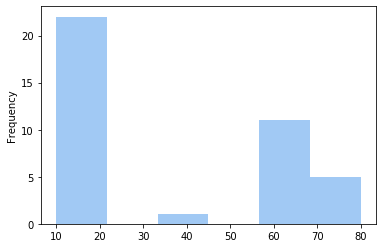

In [159]:
tabla.difer.plot.hist(bins= 6)

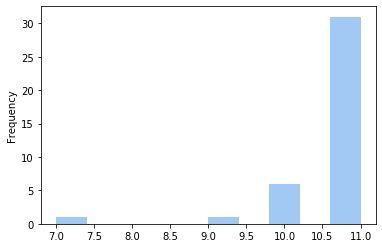

In [161]:
tabla.clusters_bic.plot.hist()